# Spreading Factor Assignment Strategy for Coverage and Capacity Flexible trade-off
### Authors : Luiz (UFJF), Álvaro (UFJF), Jessika (UFRN), Vicente Sousa (UFRN)

**Targets:**
- HOWTO material to download, configure and compile the code;
- HOWTO material to create, run and plot simulations results (including Python scripts);
- Preliminaly analyses of simulation results

**Targets to new students**
- Learn to simulate LoRAWAN ADR (code and simulation scritps)
- Enhance code and simulation scripts (e.g., upgrading to new ns-3 version)

# 0. Compile and run already commit code

```bash
cd ns-3_LoRAWAN_basics/ns-allinone-3.29/ns-3.29/
```
- To configure, type:

```bash
CXXFLAGS="-Wall -g -O0" ./waf --build-profile=debug --disable-examples --disable-tests --disable-python configure
```

- To compile, type:

```bash
./waf
```

- To test, type:

```bash
./waf --run 'ADR_code --nDevices=3000 --radius=3000 --algoritmo=3'
```

# 1. Getting started

### Download Process

- To download base repositories, to prepare the complete code, to compile and to test, please, open and understand the script **ns3_full_installation.sh**. It was create to automatically install the code following the three steps:
- Download and solve the dependences;
- Download the ns-3.29 code;
- Download the LoRaWAN ns-3 module (from **https://github.com/signetlabdei/lorawan**) 
- Merge codes from ns-3.29 and LoRaWAN ns-3 module repositories;
- Add changes with new ADR codes (from **LoRa-Luiz-vicente** folder).

The script **ns3_full_installation.sh** should be called inside the folder **ns-3_LoRAWAN_basics** (directory of this repository). However, this script has already been executed, with all contents generated and commited into the repository. So, for sake of simplicity, you do not need to repeat its execution every repository clonning. Type in the terminal:

```bash
chmod + ns3_full_installation.sh
./ns3_full_installation.sh
```

### Manually configure, compile, and run code

- To go to the code directory, please, type:

```bash
cd ns-3_LoRAWAN_basics/new_code/ns-allinone-3.29/ns-3.29/
```
- To configure, type:

```bash
CXXFLAGS="-Wall -g -O0" ./waf --build-profile=debug --disable-examples --disable-tests --disable-python configure
```

- To compile, type:

```bash
./waf
```

- To test, type:

```bash
./waf --run 'ADR_code --nDevices=3000 --radius=3000 --algoritmo=3'
```

# 2. Simulation Campaings (creation, run and plot)

Our processes to create, run and plot a simulation campaign are completely based on **yaml** files. In these files, a set of parameters is definied as well as the target parameter to a **parametric evaluation**. Such parametric evaluation allows for the analyses of the LoRaWAN metrics in function of the defined range of the target parameter.

The **yaml** file will be used by to Python functions: the **loraScript.py**, which generates all auxiliary files to run simulations; and **plotScript.py**, which plots the simulation results.

Herein, we provide three campaigns we used to perform the proof-of-concept simulations of our ADR proposal. The **(target parameter** defines the x-axis of the generated plots. Simulation campaigns are:

- **ADR_campaign1**
  - **nDevices** campaign with the following parameters:
    - nDevices (target parameter): 1000, 2000, 3000, 4000, 5000, 6000;
    - radius: 3000
   
  - **radius** campaign with the following parameters:
    - radius (target parameter): 2000, 3000, 4000, 6000, 8000, 10000;
    - nDevices: 3000 


- **ADR_campaign2**
  - **nDevices** campaign with the following parameters:
    - nDevices (target parameter): 1000, 2000, 3000, 4000, 5000, 6000;
    - radius: 6000
   
  - **radius** campaign with the following parameters:
    - radius (target parameter): 2000, 3000, 4000, 6000, 8000, 10000;
    - nDevices: 6000 


- **ADR_campaign3**
  - **nDevices** campaign with the following parameters:
    - nDevices (target parameter): 1000, 2000, 3000, 4000, 5000, 6000;
    - radius: 10000
   
  - **radius** campaign with the following parameters:
    - radius (target parameter): 2000, 3000, 4000, 6000, 8000, 10000;
    - nDevices: 1000 


**Attention**: maybe you need to specify the **ns3_path** (with our complete path) to run simulation in our local machine.


Considering the algorithms, we define the following sequence (TODO Gabriel: atualizar essa lista de acordo com o código e o artigo do JCIS):
  - (I) Fixed at the lowest SF
  - (II)  Fixed  at  the  highest  SF
  - (III)  Equally  divided
  - (IV) Arbitrarily divided - Capacity enhancement (a= {0.6,0.2,0.05,0.05,0.05,0.05})
  - (V) Arbitrarily divided - Coverage enhancement (a={0.05,0.05,0.05,0.05,0.2,0.6})
  - (VI) Sensitivity based
  - (VII) Sensitivity based arbitrarily divided - Capacity enhancement (a= {0.6,0.2,0.05,0.05,0.05,0.05})
  - (VIII) Sensitivity based arbitrarily divided - Coverage enhancement (a={0.05,0.05,0.05,0.05,0.2,0.6})
  - (IX) Random assignment
  - (X) Wiht reallocation (to further investigations)

### Campaign Criation

To configure the simulation campaign and create **ADR_campaign....yaml** file, run the following codes. We set a number of 10 simulation runs (configurable) to get statiscal confidence of performance metrics. 

We create three **ADR_campaign....yaml** files for each campaign, one for running scripts on our remote simulation cluster (**ADR_campaign1_cluster.yaml**), other for running simulation on local machine (**ADR_campaign1_local.yaml**)  and another for plotting results on local machine (**ADR_campaign1_plot.yaml**). This is necessary because different directories.


**Files for Campaign 1:** Radius = 3000 with variation of nDevices, and nDevices = 3000 with variation of Radius

Filenames:  
- ADR_campaign1_local.yaml
- ADR_campaign1_cluster.yaml
- ADR_campaign1_plot.yaml

**Warning**: those files are the same, excepting the path of simulation results

In [1]:
%%file ADR_campaign1_local.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN1
    # Set location of simulation: local or cluster
    simLocation: local
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    #Number of tasks per script (.sh)
    ntasks: 8
    # max simulation time in cluster no formato dias:horas:minutos
    clustertime: 3-00:00
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 3000
        - 1000
        - 2000 
        - 4000
        - 5000
        - 6000 
    # The radius of the area to simulate
    radius: 
        - 3000
        - 2000
        - 4000
        - 6000
        - 8000
        - 10000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: /home/vicente/ns3_repo/ns-3_LoRAWAN_basics/HD_ADR_01/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code


Overwriting ADR_campaign1_local.yaml


In [2]:
%%file ADR_campaign1_cluster.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN1
    # Set location of simulation: local or cluster
    simLocation: cluster
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    #Number of tasks per script (.sh)
    ntasks: 8
    # max simulation time in cluster no formato dias:horas:minutos
    clustertime: 3-00:00
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 3000
        - 1000
        - 2000 
        - 4000
        - 5000
        - 6000 
    # The radius of the area to simulate
    radius: 
        - 3000
        - 2000
        - 4000
        - 6000
        - 8000
        - 10000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: /home/jcdsilva/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code


Overwriting ADR_campaign1_cluster.yaml


In [1]:
%%file ADR_campaign1_plot.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN1
    # Set location of simulation: local or cluster
    simLocation: local
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    #Number of tasks per script (.sh)
    ntasks: 8
    # max simulation time in cluster no formato dias:horas:minutos
    clustertime: 3-00:00
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 3000
        - 1000
        - 2000 
        - 4000
        - 5000
        - 6000 
    # The radius of the area to simulate
    radius: 
        - 3000
        - 2000
        - 4000
        - 6000
        - 8000
        - 10000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: ./simulations_vicente/
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code  


Writing ADR_campaign1_plot.yaml


**Files for Campaign 2:** Radius = 6000 with variation of nDevices, and nDevices = 6000 with variation of Radius
Filenames:  

- ADR_campaign2_local.yaml
- ADR_campaign2_cluster.yaml
- ADR_campaign2_plot.yaml

In [4]:
%%file ADR_campaign2_local.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN2
    # Set location of simulation: local or cluster
    simLocation: local
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    #Number of tasks per script (.sh)
    ntasks: 8
    # max simulation time in cluster no formato dias:horas:minutos
    clustertime: 3-00:00
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 6000
        - 3000
        - 1000
        - 2000 
        - 4000
        - 5000         
    # The radius of the area to simulate
    radius: 
        - 6000
        - 3000
        - 2000
        - 4000
        - 8000
        - 10000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: /home/vicente/ns3_repo/ns-3_LoRAWAN_basics/HD_ADR_01/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code


Overwriting ADR_campaign2_local.yaml


In [5]:
%%file ADR_campaign2_cluster.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN2
    # Set location of simulation: local or cluster
    simLocation: cluster
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    #Number of tasks per script (.sh)
    ntasks: 8
    # max simulation time in cluster no formato dias:horas:minutos
    clustertime: 3-00:00
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 6000
        - 3000
        - 1000
        - 2000 
        - 4000
        - 5000         
    # The radius of the area to simulate
    radius: 
        - 6000
        - 3000
        - 2000
        - 4000
        - 8000
        - 10000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: /home/jcdsilva/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code

Overwriting ADR_campaign2_cluster.yaml


In [2]:
%%file ADR_campaign2_plot.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN2
    # Set location of simulation: local or cluster
    simLocation: local
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    #Number of tasks per script (.sh)
    ntasks: 8
    # max simulation time in cluster no formato dias:horas:minutos
    clustertime: 3-00:00
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 6000
        - 3000
        - 1000
        - 2000 
        - 4000
        - 5000         
    # The radius of the area to simulate
    radius: 
        - 6000
        - 3000
        - 2000
        - 4000
        - 8000
        - 10000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: ./simulations_vicente/
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code

Writing ADR_campaign2_plot.yaml


**Files for Campaign 3:** Radius = 10000 with variation of nDevices, and nDevices = 1000 with variation of Radius

Filenames:  

- ADR_campaign3_local.yaml
- ADR_campaign3_cluster.yaml
- ADR_campaign3_plot.yaml

In [7]:
%%file ADR_campaign3_local.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN3
    # Set location of simulation: local or cluster
    simLocation: local
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    #Number of tasks per script (.sh)
    ntasks: 8
    # max simulation time in cluster no formato dias:horas:minutos
    clustertime: 3-00:00
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 1000
        - 3000
        - 2000 
        - 4000
        - 5000
        - 6000 
    # The radius of the area to simulate
    radius: 
        - 10000
        - 3000
        - 2000
        - 4000
        - 6000
        - 8000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: /home/vicente/ns3_repo/ns-3_LoRAWAN_basics/HD_ADR_01/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code

Overwriting ADR_campaign3_local.yaml


In [8]:
%%file ADR_campaign3_cluster.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN3
    # Set location of simulation: local or cluster
    simLocation: cluster
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    #Number of tasks per script (.sh)
    ntasks: 8
    # max simulation time in cluster no formato dias:horas:minutos
    clustertime: 3-00:00
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 1000
        - 3000
        - 2000 
        - 4000
        - 5000
        - 6000 
    # The radius of the area to simulate
    radius: 
        - 10000
        - 3000
        - 2000
        - 4000
        - 6000
        - 8000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: /home/jcdsilva/ns-3-lora-gppcom/ns-allinone-3.29/ns-3.29
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code

Overwriting ADR_campaign3_cluster.yaml


In [3]:
%%file ADR_campaign3_plot.yaml
scenario:
    # Output filename (and part of output dir)
    filename: CampaignLoraWAN3
    # Set location of simulation: local or cluster
    simLocation: local
    # Set campaign scenario: a name of one valid parameter
    #campaign: radius
    # Set campaign scenario: a name of one valid parameter
    #campaignX: name of parameter to vary in the X-axis
    #campaignLines: name of parameter to vary in different lines
    campaignX: 
        - radius
        - nDevices
    campaignLines: 
        - algoritmo
    # Number of jobs to run
    jobs: 10
    #Number of tasks per script (.sh)
    ntasks: 8
    # max simulation time in cluster no formato dias:horas:minutos
    clustertime: 3-00:00
    # Simulation duration (seconds)
    simulationTime: 600
    # Number of end devices to include in the simulation
    nDevices:
        - 1000
        - 3000
        - 2000 
        - 4000
        - 5000
        - 6000 
    # The radius of the area to simulate
    radius: 
        - 10000
        - 3000
        - 2000
        - 4000
        - 6000
        - 8000
    # The period in seconds to be used by periodically transmitting applications
    appPeriodSeconds: 600
    # Whether or not to print various informations
    bPrint: false
    # Fixed seed and run seed (set false for a long simulation campaign)
    fixedSeed: false
    # Algoritmo de ADR: 1 to 5
    algoritmo: 
        - 1
        - 2
        - 3
        - 4
        - 5
        - 6
        - 7
        - 8
        - 9
    # Target realocation for Algorithm 7
    targetRealocation:
        - 0
    # Complete path of ns-3 simulator
    ns3_path: ./simulations_vicente/
    # Script with the main code (inside scratch folder without .cc)
    ns3_script: ADR_code

Writing ADR_campaign3_plot.yaml


A seguinte função em python foi criada para, de posse do arquivo **yaml**, criar um arquivo **.sh** para rodar a campanha de simulação.  Ao executar esse código no Jupyter Notebook (Shift+Enter), o arquivo **loraScript.py** é gerado.

In [1]:
%%file loraScript.py
from collections import defaultdict
import os
import math
import random
import re
import subprocess
import sys
import argparse
from glob import glob
import numpy as np
import matplotlib.pylab as plt
from itertools import cycle
# To install YAML: sudo apt-get install python3-yaml
import yaml


ntaskst=0
maxtasksperscript = 0

class Simulation:
  
    def __init__(self, configurations_file):
        #self.email_to = 'sicrano@gmail.com'            
        with open(configurations_file, 'r') as f:
            self.doc = yaml.load(f, Loader=yaml.loader.BaseLoader)
        self.campaign_name = os.path.splitext(configurations_file)[0]
        
        # Read commom parameters
        self.campaignX = self.doc['scenario']['campaignX']
        self.campaignLines = self.doc['scenario']['campaignLines'][0]
        self.simLocation = str(doc['scenario']['simLocation'])
        self.simulationTime = self.doc['scenario']['simulationTime']
        self.nDevices = self.doc['scenario']['nDevices'][0]
        self.radius = self.doc['scenario']['radius'][0]
        self.appPeriodSeconds = self.doc['scenario']['appPeriodSeconds']
        self.bPrint = (self.doc['scenario']['bPrint'])
        self.fixedSeed = (self.doc['scenario']['fixedSeed'])
        self.algoritmo = self.doc['scenario']['algoritmo'][0]
        self.ns3_path = str(self.doc['scenario']['ns3_path'])
        #self.ns3_path = os.getcwd() + '/' + self.ns3_path
        self.ns3_path = self.ns3_path
        self.ns3_script = str(self.doc['scenario']['ns3_script'])
        self.nJobs = int(self.doc['scenario']['jobs'])
        self.nlines= len(self.doc['scenario']['algoritmo'])
        self.nparamxdevices= len(self.doc['scenario']['nDevices'])
        #self.nparamxradius= len(self.doc['scenario']['radius])
        self.targetRealocation  = (self.doc['scenario']['targetRealocation'])[0]
        self.filename = str(self.doc['scenario']['filename'])
        self.configurations_file = configurations_file
       
        global ntaskst
        global maxtasksperscript 
        
        ntaskst=str(self.nJobs*self.nlines*self.nparamxdevices)
        maxtasksperscript = 64
    

       
    def runCampaign(self,curCampaign):
        # Configure simulation file in accordance with campaign parameter
        sh_name = self.campaign_name + '_' + curCampaign
        
        print(curCampaign+" campaign written in file: " 'run_%s.sh' % sh_name)
        with open('run_%s.sh' % sh_name, 'w') as f:                    
            
            f.write('#!/bin/bash\n')
            
            outputDir = self.ns3_path+'/results_'+ self.filename + '_' + curCampaign
            f.write('rm -rf '+outputDir+' 2>/dev/null\n')
            f.write('mkdir -p '+outputDir+'\n')
            f.write('cp -f run_'+sh_name+'.sh'+' '+outputDir+'\n')
            f.write('cp -f '+self.configurations_file+ ' ' +outputDir+'\n')
            f.write("cd '"+self.ns3_path+"'"+"\n")
         
            ic = 1;    
            for iJob in range(0, self.nJobs):
                jobRunSeed = random.randint(1, 23*10**14)
                for curLine in self.doc['scenario'][self.campaignLines]:                           
                    for varParam in self.doc['scenario'][curCampaign]:
                        command = (
                        'NS_GLOBAL_VALUE="RngRun='+str(jobRunSeed)+ '" ' +
                        "./waf --run '"+self.ns3_script+
                        " --radius="+self.radius+
                        " --nDevices="+self.nDevices+
                        " --simulationTime="+self.simulationTime+
                        " --appPeriodSeconds="+self.appPeriodSeconds+
                        " --print="+self.bPrint+
                        " --fixedSeed="+str(self.fixedSeed)+
                        " --targetRealocation="+self.targetRealocation+
                        " --algoritmo="+self.algoritmo+
                        " --filename="+ self.filename +
                        " --outputDir='"+outputDir+"'"
                        " --"+self.campaignLines+"="+curLine+
                        " --"+curCampaign+"="+varParam+
                        "'"
                        )
                       
                        f.write(command+' & wait\n')
                        #if ((ic % 7) == 0):
                        #    f.write(command+' & wait\n')
                        #else:
                        #    f.write(command+' &\n')
                        #ic = ic + 1;    
                


    def runCampaigncluster(self,curCampaign,ntasks,nscript,lastjob,lastcurline,lastvarParam):
        # Configure simulation file in accordance with campaign parameter
                              
        
        sh_name = campaign_name + '_' + curCampaign + '/'+ campaign_name + '_' + curCampaign + '_' + str(nscript)
        
        
        print(curCampaign+" campaign written in file: " 'run_%s.sh' % sh_name)
        with open('run_%s.sh' % sh_name, 'w') as f:                    
            
            f.write('#!/bin/bash\n')
            P =  '" srun -N 1 -n 1 '

                
            f.write('#SBATCH --time=10-00:00          #Tempo máximo do job no formato DIAS-HORAS:MINUTOS\n')
            f.write('#SBATCH --ntasks=' +str(ntasks)+ '\n')
            f.write('module load compilers/gnu/7.3\n')
            f.write('module load softwares/python/3.6-anaconda-5.0.1\n')
            
            outputDir = self.ns3_path+'/results_'+ self.filename + '_' + curCampaign
            f.write('rm -rf '+outputDir+' 2>/dev/null\n')
            f.write('mkdir -p '+outputDir+'\n')
            f.write('cp -f run_'+sh_name+'.sh'+' '+outputDir+'\n')
            f.write('cp -f '+self.configurations_file+ ' ' +outputDir+'\n')
            f.write("cd '"+self.ns3_path+"'"+"\n")
            
                                            
           
            x=0;
            lastjobout=0;
            lastcurlineout=0;
            lastvarParamout=0;
            
            lastjobb=0;
            lastcurlinee=0;
            lastvarParamm=0;
           

            if nscript==0 :
                #while x<ntasks:
                     for iJob in range(0, self.nJobs):
                         if x >=ntasks:
                                     break
                         jobRunSeed = random.randint(1, 23*10**14)
                         lastjobout=iJob
                         for icurLine in range (0,len(self.doc['scenario'][self.campaignLines])):
                             if x >=ntasks:
                                     break
                             lastcurlineout= icurLine
                             curLine= self.doc['scenario'][self.campaignLines][icurLine]
                        
                             for ivarParam in range (0, len (self.doc['scenario'][curCampaign])):
                                 if x >= ntasks:
                                     break
                               
                                 
                                 lastvarParamout= ivarParam
                                 varParam= self.doc['scenario'][curCampaign][ivarParam]
                                 
                                 print('Ṕara x=' + str(x)+ '  job:'+str(lastjobout) + '   line:'+ str(lastcurlineout) + '   var:'+ str(lastvarParamout) )
                        
                               
                                 command = (
                                 'NS_GLOBAL_VALUE="RngRun='+str(jobRunSeed)+ '" ' +P+
                                 "./waf --run '"+self.ns3_script+
                                 " --radius="+self.radius+
                                 " --nDevices="+self.nDevices+
                                " --simulationTime="+self.simulationTime+
                                    " --appPeriodSeconds="+self.appPeriodSeconds+
                                    " --print="+self.bPrint+
                                    " --fixedSeed="+str(self.fixedSeed)+
                                    " --targetRealocation="+self.targetRealocation+
                                    " --algoritmo="+self.algoritmo+
                                    " --filename="+ self.filename +
                                    " --outputDir='"+outputDir+"'"
                                    " --"+self.campaignLines+"="+curLine+
                                    " --"+curCampaign+"="+varParam+"'" )
                                 f.write(command +' & \n')
                                 x=x+1
                             
                            
                            
                                
                              
                           
                         
                         
                      
                                        
     
                        
            else:
                 #while x<ntasks:
                         
                    if lastvarParam ==len (self.doc['scenario'][curCampaign])-1:
                        lastvarParamm=0;
                        lastcurlinee= lastcurline+1
                        if lastcurline==len(self.doc['scenario'][self.campaignLines])-1:
                            lastcurlinee=0;
                            lastjobb= lastjob+1;
                            if lastjob==self.nJobs -1:
                                lastjobb=0;
                    else:
                        lastcurlinee= lastcurline
                        lastjobb= lastjob
                        lastvarParamm= lastvarParam +1
                        
                    print('Recebido:   job:'+ str(lastjob)+ '\n line:' + str(lastcurline) + '\n var:' + str(lastvarParam))
                    print('Transformado:  job:'+ str(lastjobb)+ '\n line:' + str(lastcurlinee) + '\n  var:' + str(lastvarParamm) + '\n \n')
                    
                   
                    for iJob in range(lastjobb, self.nJobs):
                        if x >= ntasks:
                                 break
                       
                        lastjobout=iJob
                        jobRunSeed = random.randint(1, 23*10**14)
                    

                            
                        for icurLine in range (lastcurlinee,len(self.doc['scenario'][self.campaignLines])):
                            if x >= ntasks:
                                 break
                            lastcurlineout= icurLine
                            curLine= self.doc['scenario'][self.campaignLines][icurLine]  
                            for ivarParam in range (lastvarParamm, len (self.doc['scenario'][curCampaign])):
                                if x >= ntasks:
                                 break
                                lastvarParamout= ivarParam
                                varParam= self.doc['scenario'][curCampaign][ivarParam]
                                print('Ṕara x=' + str(x)+ '  job:'+str(lastjobout) + '   line:'+ str(lastcurlineout) + '   var:'+ str(lastvarParamout) )
                                
                                
                               
                                command = (
                                'NS_GLOBAL_VALUE="RngRun='+str(jobRunSeed)+ '" ' +P+
                                "./waf --run '"+self.ns3_script+
                               " --radius="+self.radius+
                                " --nDevices="+self.nDevices+
                                     " --simulationTime="+self.simulationTime+
                                " --appPeriodSeconds="+self.appPeriodSeconds+
                                  " --print="+self.bPrint+
                                  " --fixedSeed="+str(self.fixedSeed)+
                              " --targetRealocation="+self.targetRealocation+
                                     " --algoritmo="+self.algoritmo+
                                       " --filename="+ self.filename +
                               " --outputDir='"+outputDir+"'"
                                        " --"+self.campaignLines+"="+curLine+
                                     " --"+curCampaign+"="+varParam+"'"
                               )
                                f.write(command+' & \n')
                                x=x+1
                            lastvarParamm=0;
                        lastcurlinee=0;
                                
        print('\n \n saida:  job:'+ str(lastjobout)+ '\n line:' + str(lastcurlineout) + '\n var:' + str(lastvarParamout))
              
                            
        return( lastjobout,lastcurlineout,lastvarParamout)
                        
                               
                              
             
        
                      
parser = argparse.ArgumentParser()
parser.add_argument("-f", "--file", type=str, help='Configuration File')
args = parser.parse_args()

configurations_file = args.file; 
with open(configurations_file, 'r') as f:
    doc = yaml.load(f, Loader=yaml.loader.BaseLoader)
    campaign_name = os.path.splitext(configurations_file)[0]

print('Simulação escolhida: ')
campaign = doc['scenario']['campaignX']
print(campaign)

simLocation = str(doc['scenario']['simLocation'])
if simLocation == 'cluster':
    with open('run_NPAD_%s.sh' % campaign_name, 'w') as fnpad:
        fnpad.write('#!/bin/bash\n')
        #fnpad.write('#SBATCH --time=10-00:00          #Tempo máximo do job no formato DIAS-HORAS:MINUTOS\n')
        
simu = Simulation(configurations_file)



for simC in campaign:
    if str(simC) == 'nDevices' or str(simC) == 'radius' or str(simC) == 'targetRealocation':
       
        if simLocation == 'cluster':
            lastjob=0;
            lastcurline=0;
            lastvarParam=0;
            #global ntaskst
            #global maxtasksperscript
            #print(ntaskst)
           # print(maxtasksperscript)
            nscripts = math.ceil(int(ntaskst)/maxtasksperscript)
            os.mkdir('run_'+ campaign_name + '_' + simC)
            
            for i in range (0,nscripts -1):
                with open('run_NPAD_%s.sh' % campaign_name, 'a') as fnpad:
                    sh_name = campaign_name + '_' + simC + '/'+ campaign_name + '_' + simC + '_' + str(i)
                    fileName = ('run_%s.sh' % sh_name);
                    fnpad.write('sbatch '+fileName+'\n')
                    lastjob,lastcurline,lastvarParam=simu.runCampaigncluster(simC,maxtasksperscript,i,lastjob,lastcurline,lastvarParam);
            ntaskslast= int(ntaskst) -((nscripts -1)*maxtasksperscript)
            lastjob,lastcurline,lastvarParam=simu.runCampaigncluster(simC,ntaskslast,nscripts-1,lastjob,lastcurline,lastvarParam);
            print(nscripts)        
        else:
            simu.runCampaign(simC);

    else:
        print('Invalid simulation campaign: verify the campaign parameter!')


Overwriting loraScript.py


O Script **loraScript.py** recebe um arquivo **yaml** com parâmetro de entrada e gera os segugintes arquivos:

- **run_campanha_local_nDevices.sh**: com as chamadas para as simulações variando o número de dispositivos;
- **run_campanha_local_radius.sh**: com as chamadas para as simulações variando o raio.

Esses dois arquivos **.sh** devem ser chamados em um terminal, chamando as simulações especificas de cada caso.

Abaixo, o script **loraScript.py** é chamado para a **campanha_1.yaml** criada anteriormente.


In [2]:
%run loraScript -f "ADR_campaign1_local.yaml"

Simulação escolhida: 
['radius', 'nDevices']
radius campaign written in file: run_ADR_campaign1_local_radius.sh
nDevices campaign written in file: run_ADR_campaign1_local_nDevices.sh


Foram criados dois arquivos:

  - **run_ADR_campaign1_local_radius.sh:** chamadas das simulação da parte 1 da campanha 1;
  - **run_ADR_campaign1_local_nDevices.sh:** chamadas das simulação da parte 2 da campanha 1;

Se a opção cluster for escolhida, um arquivo adicional é gerado:
  - **run_NPAD_ADR_campaign1_cluster.sh:** comando para ser chamado no cluster com objetivo de escalonar as simulações definidas em  **run_ADR_campaign1_cluster_radius.sh:** e **run_ADR_campaign1_cluster_nDevices.sh:**.


Para rodar o código em um terminal, digite:

```python
python3 loraScript.py -f 'ADR_campaign1_cluster.yaml'
```

O mesmo pode ser feito para as demais campanhas:

In [3]:
%run loraScript -f "ADR_campaign2_local.yaml"
%run loraScript -f "ADR_campaign3_local.yaml"

Simulação escolhida: 
['radius', 'nDevices']
radius campaign written in file: run_ADR_campaign2_local_radius.sh
nDevices campaign written in file: run_ADR_campaign2_local_nDevices.sh
Simulação escolhida: 
['radius', 'nDevices']
radius campaign written in file: run_ADR_campaign3_local_radius.sh
nDevices campaign written in file: run_ADR_campaign3_local_nDevices.sh


O código a seguir executa os arquivos **.sh** diretamente deste Jupyter Notebook (simulação local).

In [1]:
!chmod +x ./run_ADR_campaign1_local_radius.sh
!./run_ADR_campaign1_local_radius.sh

Waf: Entering directory `/home/vicente/ns3_repo/ns-3_LoRAWAN_basics/HD_ADR_01/ns-allinone-3.29/ns-3.29/build'
Waf: Leaving directory `/home/vicente/ns3_repo/ns-3_LoRAWAN_basics/HD_ADR_01/ns-allinone-3.29/ns-3.29/build'
Build commands will be stored in build/compile_commands.json
'build' finished successfully (3.053s)
simulation start at: Fri Dec  3 22:02:22 2021

Running with nDevices = 3000, radius = 3000 m, simulation Time =600 s, appPeriodSeconds = 600 s, Algoritmo ADR = 1, targetRealocation = 0, seed = 1, run stream = 651037085, outputDir = /home/vicente/ns3_repo/ns-3_LoRAWAN_basics/HD_ADR_01/ns-allinone-3.29/ns-3.29/results_CampaignLoraWAN1_radius
simulation finished at: Fri Dec  3 22:05:04 2021

Time elapsed: 2.7 minutes
Waf: Entering directory `/home/vicente/ns3_repo/ns-3_LoRAWAN_basics/HD_ADR_01/ns-allinone-3.29/ns-3.29/build'
Waf: Leaving directory `/home/vicente/ns3_repo/ns-3_LoRAWAN_basics/HD_ADR_01/ns-allinone-3.29/ns-3.29/build'
Build commands will be stored in build/compi

In [ ]:
!chmod +x ./run_ADR_campaign1_local_nDevices.sh
!./run_ADR_campaign1_local_nDevices.sh

In [ ]:
!chmod +x ./run_ADR_campaign2_local_radius.sh
!./run_ADR_campaign2_local_radius.sh


!chmod +x ./run_ADR_campaign2_local_nDevices.sh
!./run_ADR_campaign2_local_nDevices.sh

In [ ]:
!chmod +x ./run_ADR_campaign3_local_radius.sh
!./run_ADR_campaign3_local_radius.sh


!chmod +x ./run_ADR_campaign3_local_nDevices.sh
!./run_ADR_campaign3_local_nDevices.sh

Os arquivos **.sh** acima chamam as simulações uma a uma, guardando o resultados no seguintes arquivos e pastas:


- **results_CampaignLoraWAN1_nDevices:** parte 1 da campanha 1;
- **results_CampaignLoraWAN1_radius:** parte 1 da campanha 1;
- **results_CampaignLoraWAN2_nDevices:** parte 1 da campanha 2;
- **results_CampaignLoraWAN2_radius:** parte 2 da campanha 2;
- **results_CampaignLoraWAN3_nDevices:** parte 1 da campanha 3;
- **results_CampaignLoraWAN3_radius:** parte 2 da campanha 3;

Como ilustração, a primeira campanha foi executada diretamente do ipynb. As demais foram rodadas em paralelo em terminais diferentes.

# Plotar gráficos 

Para plotar gráficos, chamaremos o mesmo arquivo **yaml** que foi usado para criar as campanhas de simulação. Um novo script chamado **plotScript.py** foi construído para esse fim. Ao executar esse código no Jupyter Notebook (Shift+Enter), o arquivo **plotScript.py** é gerado.

In [4]:
%%file plotScript.py
# Legend
#   RunSeed: 0
#   Seed: 1
#   Algoritmo: 2
#   Radius: 3
#   nDevices: 4
#   appPeriodSeconds:5
#   simulationTime:6
#   PHYTotal: 7
#   PHYSuccessful:8 
#   PHYInterfered: 9
#   PHYNoMoreReceivers: 10
#   PHYUnderSensitivity: 11
#   PHYLostBecauseTX: 12
#   SimulationDuration: 13

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pylab as plt
from itertools import cycle
import scipy.stats as st
import os
import argparse
import yaml
import matplotlib
from random import randint   
import itertools

# New plots
#import matplotlib
# Fix on matplotlib issue with backend
#matplotlib.use('Agg')
#import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

class openSimulation:
    def __init__(self, configurations_file):
        self.email_to = 'fulano@gmail.com'            
        with open(configurations_file, 'r') as f:
            self.doc = yaml.load(f, Loader=yaml.loader.BaseLoader)
        self.campaign_name = os.path.splitext(configurations_file)[0]
        
        # Read commom parameters
        self.showPlot = True;
        self.plotCI = True;                
        self.campaignX = self.doc['scenario']['campaignX']
        self.campaignLines = self.doc['scenario']['campaignLines'][0]
        self.simLocation = str(doc['scenario']['simLocation'])
        self.simulationTime = self.doc['scenario']['simulationTime']
        self.nDevices = self.doc['scenario']['nDevices']
        self.nDevices = list(map(float,self.nDevices))
        self.radius = self.doc['scenario']['radius']
        self.radius = list(map(float,self.radius))
        self.appPeriodSeconds = self.doc['scenario']['appPeriodSeconds']
        self.bPrint = (self.doc['scenario']['bPrint'])
        self.fixedSeed = (self.doc['scenario']['fixedSeed'])
        self.Algoritmo = self.doc['scenario']['algoritmo']
        self.ns3_path = str(self.doc['scenario']['ns3_path'])
        #self.ns3_path = os.getcwd() + '/' + self.ns3_path
        self.ns3_script = str(self.doc['scenario']['ns3_script'])
        self.nJobs = int(self.doc['scenario']['jobs'])
        if self.nJobs == 1: # disable the confidence interval
            self.plotCI = False;
        self.filename = str(self.doc['scenario']['filename'])
        self.targetRealocation  = self.doc['scenario']['targetRealocation']
        
    def doLabelalgoritmo(self, algID):
        # Define labels for plots legends
        if algID == '1':
            return "SF7 (I)"
        elif algID == '2':
            return "SF 12 (II)"
        elif algID == '3':
            return "Equal Split (III)"
        elif algID == '4':
            return "Proposed for Capacity (IV)"
        elif algID == '5':
            return "Proposed for Coverage (V)"
        elif algID == '6':
            return "Sensitivity-based (VI)"
        elif algID == '7':
            return "Proposed sensitivity-based for Capacity (VII)"
        elif algID == '8':
            return "Proposed sensitivity-based for Coverage (VIII)"
        elif algID == '9':
            return "Random ADR (IX)"
        
    def doLabeltargetRealocation(self, realocRate):
        # Define labels for plots legends
        return "Real. = "+realocRate+" %"
        
    def plotCampaign(self,curCampaign, metric):
        # some general configurations
        #outputDir = self.ns3_path+'/results_'+self.simLocation + '_' + curCampaign
        outputDir = self.ns3_path+'/results_'+self.filename+'_' + curCampaign
        chFile = outputDir+ "/" + self.filename + '.txt'        
        print(chFile)
        simTime = np.loadtxt(chFile, skiprows=1, usecols=(6, ), delimiter=',', unpack=False)                
        resalgoritmo = np.loadtxt(chFile, skiprows=1, usecols=(2, ), delimiter=',', unpack=False)
        restargetRealocation = np.loadtxt(chFile, skiprows=1, usecols=(14, ), delimiter=',', unpack=False)
        resradius = np.loadtxt(chFile, skiprows=1, usecols=(3, ), delimiter=',', unpack=False)
        resnDevices = np.loadtxt(chFile, skiprows=1, usecols=(4, ), delimiter=',', unpack=False)
        ressimDur = np.loadtxt(chFile, skiprows=1, usecols=(13, ), delimiter=',', unpack=False)
        resphyTotal = np.loadtxt(chFile, skiprows=1, usecols=(7, ), delimiter=',', unpack=False)
        resphySucc = np.loadtxt(chFile, skiprows=1, usecols=(8, ), delimiter=',', unpack=False)
        markers_on_all = cycle(list(itertools.product([0], [1,2,3,4,5])))
        markersA = cycle(('o', 'v', 'D', '>', 'P', '^', '*', '<', 's', 'H', 'D', 'd'))
        lineA = cycle(('-', '--',  '-', '--', '-', '--', '-', '--', '-', '--', '-','--'))
        colors = cycle(('b', 'g', 'r', 'c', 'm', 'y', 'k'))      
        
        plt.figure()
        fig, ax = plt.subplots()
        ax.set_facecolor("white")
        
        #for iAlg in self.algoritmo:
        for curLine in self.doc['scenario'][self.campaignLines]: 
            m_pdr, m_pdrCI, m_tput, m_tputCI, m_pkt, m_pktCI = [], [], [], [], [], []
            color=next(colors)
            marker=next(markersA)
            line=next(lineA)
            markers_on=next(markers_on_all)
            #label = self.doLabel(iAlg)            
            label = eval('self.doLabel'+self.campaignLines+'(str(curLine))')
            # Current values of line metrics'
            curMetricLine = eval('res'+self.campaignLines)
            resxData = eval('sorted(self.'+curCampaign+',key=int)')             
            
            for varParam in sorted(self.doc['scenario'][curCampaign],key=int):                
                
                # Current values of y-axis metrics
                curMetricAxis = eval('res'+curCampaign)
                resalgIndexs = (curMetricLine == int(curLine)) & (curMetricAxis == int(varParam))                
                                
                if str(curCampaign) == 'radius':
                    #resalgIndexs = (resalg == int(iAlg)) & (resradius == int(varParam))
                    chtitle = 'Settings ('+ self.doc['scenario']['nDevices'][0] +' devices)'
                    xlabel='Distance [m]'
                    #resxData = sorted(self.radius,key=int) 
                    # label = self.doLabel(iAlg)
                elif str(curCampaign) == 'nDevices':
                #    resalgIndexs = (resalg == int(iAlg)) & (resnDevices == int(varParam))                    
                    xlabel='Number of Devices'
                    chtitle = 'Settings (radius = '+ self.doc['scenario']['radius'][0] +' m)'
                #    resxData = sorted(self.nDevices,key=int)
                #    label = self.doLabel(iAlg)
                elif str(curCampaign) == 'targetRealocation':
                #    resalgIndexs = (resalg == int(iAlg)) & (restargetRealocation == int(varParam))                    
                    xlabel='Taxa de realocação [%]'
                    chtitle = 'Configuração ('+ self.doc['scenario']['nDevices'][0] +' dispositivos, raio = '+ self.doc['scenario']['radius'][0]+')'
                #    resxData = self.targetRealocation
                                        
                # Pdr Evaluation
                if metric=='PDR':                
                    # Calculate PDR line
                    pdr = 100*( resphySucc[resalgIndexs]  / resphyTotal[resalgIndexs])
                    m_pdr = np.append(m_pdr, np.mean(pdr))
                    # Confidence interval according to https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
                    l, h = st.t.interval(0.95, len(pdr)-1, loc=np.mean(pdr), scale=st.sem(pdr))
                    #l,h = st.norm.interval(0.95, loc=np.mean(pdr), scale=st.sem(pdr))                                                            
                    m_pdrCI = np.append(m_pdrCI, h)
                elif metric=='Tput':
                    # TODO
                    # Calculate Tput line
                    tput = 8*23*( resphySucc[resalgIndexs] ) / float(self.simulationTime)
                    m_tput = np.append(m_tput, np.mean(tput))
                    # Confidence interval according to https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
                    l, h = st.t.interval(0.95, len(tput)-1, loc=np.mean(tput), scale=st.sem(tput))
                    #l,h = st.norm.interval(0.95, loc=np.mean(tput), scale=st.sem(tput))                    
                    m_tputCI = np.append(m_tputCI, h)
                
            alpha = 0.2    
            # Plot line
            if metric=='PDR':                         
                #plt.plot(resxData,m_pdr, label=label, marker=marker,color=color,markevery=markers_on)   
                plt.plot(resxData,m_pdr, label=label, marker=marker,color=color,markevery=markers_on,ls=line,markersize=8.5)   
                err=(m_pdrCI-m_pdr)
                plt.fill_between(resxData, (m_pdr-err), (m_pdr+err), alpha=alpha)
                #if bool(self.plotCI):
                    #plt.errorbar(resxData,m_pdr, yerr=(m_pdrCI-m_pdr), color=color, ls = 'none', marker=marker, lw = 2, capthick = 2,markevery=markers_on)
                    
            elif metric=='Tput':
                # TODO
                #plt.plot(resxData,m_tput, label=label, marker=marker,color=color,markevery=markers_on) 
                plt.plot(resxData,m_tput, label=label, marker=marker,color=color,markevery=markers_on,ls=line,markersize=8.5) 
                err=(m_tputCI-m_tput)
                plt.fill_between(resxData, (m_tput-err), (m_tput+err), alpha=alpha)
                
                #if bool(self.plotCI):                
                #    plt.errorbar(resxData,m_tput, yerr = (m_tputCI-m_tput), marker=marker,color=color, ls = 'none', lw = 2, capthick = 2,markevery=markers_on)
            
            
        # Plot figure
        params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
        plt.rcParams.update(params)        
        os.makedirs(outputDir+"/ps", exist_ok=True)
        os.makedirs(outputDir+"/png", exist_ok=True)
        
        if metric=='PDR':        
            # Show and save PDR plot
            ylabel="PDR [%]"
            if bool(self.plotCI):
                imgfilename = 'PDR_CI_'+curCampaign
            else:
                imgfilename = 'PDR_'+curCampaign
        elif metric=='Tput':
            # Show and save PDR plot
            ylabel="Throughput [bps]"
            if bool(self.plotCI):
                imgfilename = 'TPUT_CI_'+curCampaign
            else:
                imgfilename = 'TPUT_'+curCampaign    
        
        # Plot general configuration
        nPixels = 500
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(chtitle)
        #plt.legend(loc='best', numpoints=1) 
        #plt.tight_layout()
        lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.grid()
        #box = ax.get_position()
        #ax.set_position([0.1, 0.1, box.width, box.height])
        #print(box)
        
        plt.savefig(outputDir+"/png/"+imgfilename+".png",
                    dpi=nPixels,
                    bbox_extra_artists=(lgd,),
                    bbox_inches='tight')
                   
        #plt.savefig(outputDir+"/ps/"+imgfilename+".eps")
        #if bool(self.showPlot):
        #    plt.show()
        #else:
        #    plt.close()
                
               
        
parser = argparse.ArgumentParser()
parser.add_argument("-f", "--file", type=str, help='Configuration File')
args = parser.parse_args()

configurations_file = args.file; 
with open(configurations_file, 'r') as f:
    doc = yaml.load(f, Loader=yaml.loader.BaseLoader)
    campaign_name = os.path.splitext(configurations_file)[0]

# print(doc)
print('Simulação escolhida: ')
campaign = doc['scenario']['campaignX']
print(campaign)
                 
simu = openSimulation(configurations_file)
for iMet in ['PDR', 'Tput']:
    for simC in campaign:
        if str(simC) == 'nDevices' or str(simC) == 'radius' or str(simC) == 'targetRealocation':
            simu.plotCampaign(simC,iMet);
        else:
            print('Invalid simulation campaign: verify the campaign parameter!')

Writing plotScript.py


Abaixo, o script **plotScript.py** é chamado para a **campanha_1.yaml** criada e simulada anteriormente. 

Simulação escolhida: 
['radius', 'nDevices']
./simulations_vicente//results_CampaignLoraWAN1_radius/CampaignLoraWAN1.txt
./simulations_vicente//results_CampaignLoraWAN1_nDevices/CampaignLoraWAN1.txt
./simulations_vicente//results_CampaignLoraWAN1_radius/CampaignLoraWAN1.txt
./simulations_vicente//results_CampaignLoraWAN1_nDevices/CampaignLoraWAN1.txt


<Figure size 432x288 with 0 Axes>

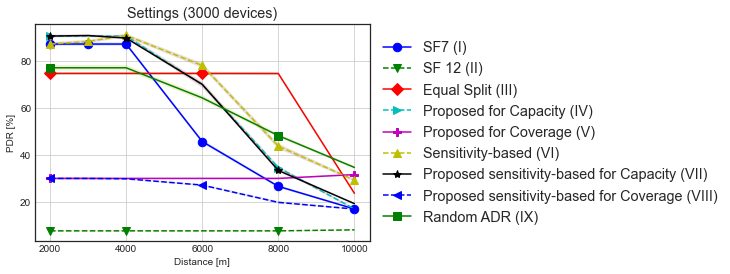

<Figure size 432x288 with 0 Axes>

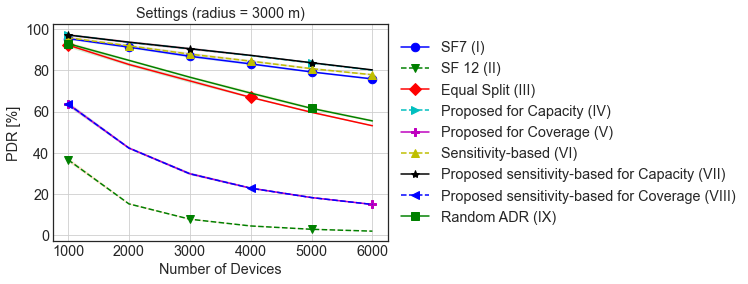

<Figure size 432x288 with 0 Axes>

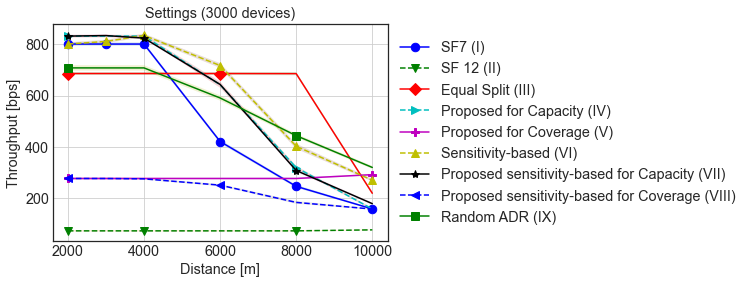

<Figure size 432x288 with 0 Axes>

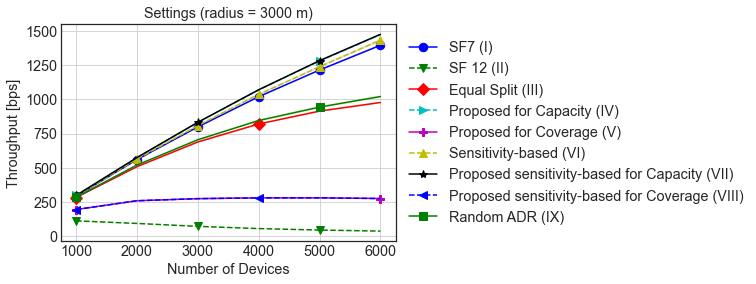

In [5]:
%run plotScript -f "ADR_campaign1_plot.yaml"

Simulação escolhida: 
['radius', 'nDevices']
./simulations_vicente//results_CampaignLoraWAN2_radius/CampaignLoraWAN2.txt
./simulations_vicente//results_CampaignLoraWAN2_nDevices/CampaignLoraWAN2.txt
./simulations_vicente//results_CampaignLoraWAN2_radius/CampaignLoraWAN2.txt
./simulations_vicente//results_CampaignLoraWAN2_nDevices/CampaignLoraWAN2.txt


<Figure size 432x288 with 0 Axes>

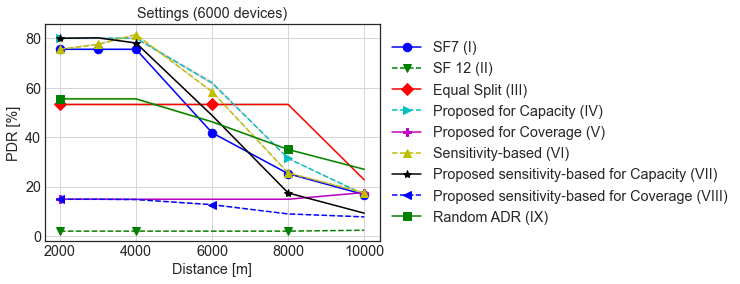

<Figure size 432x288 with 0 Axes>

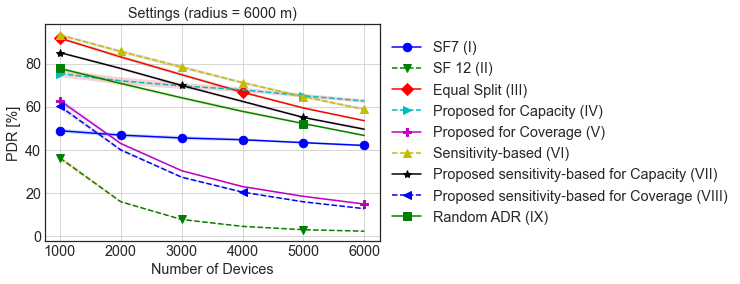

<Figure size 432x288 with 0 Axes>

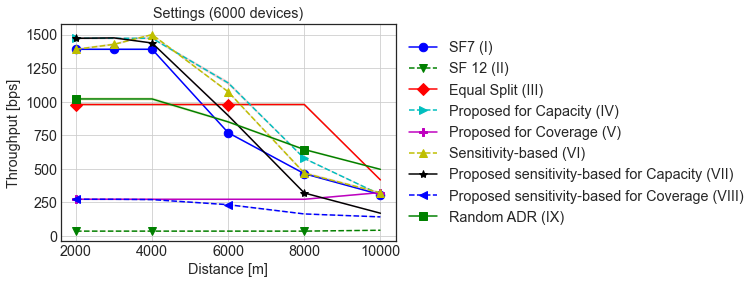

<Figure size 432x288 with 0 Axes>

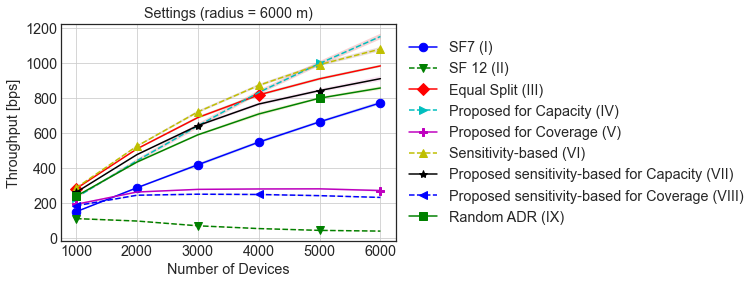

In [6]:
%run plotScript -f "ADR_campaign2_plot.yaml"

Simulação escolhida: 
['radius', 'nDevices']
./simulations_vicente//results_CampaignLoraWAN3_radius/CampaignLoraWAN3.txt
./simulations_vicente//results_CampaignLoraWAN3_nDevices/CampaignLoraWAN3.txt
./simulations_vicente//results_CampaignLoraWAN3_radius/CampaignLoraWAN3.txt
./simulations_vicente//results_CampaignLoraWAN3_nDevices/CampaignLoraWAN3.txt


<Figure size 432x288 with 0 Axes>

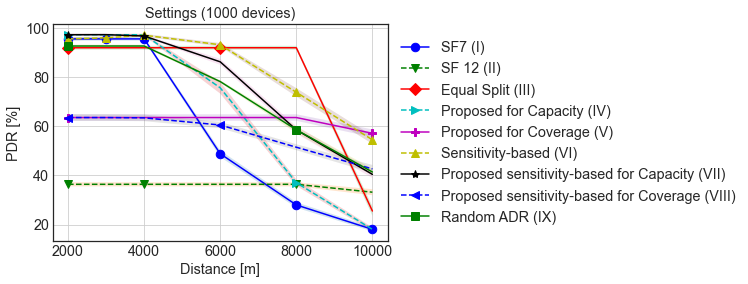

<Figure size 432x288 with 0 Axes>

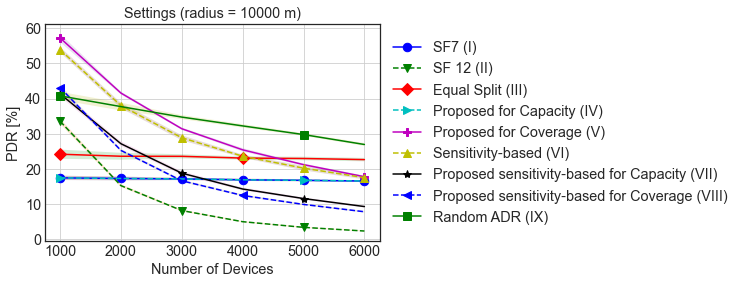

<Figure size 432x288 with 0 Axes>

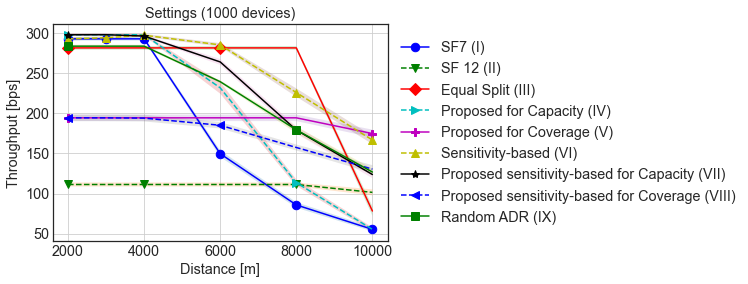

<Figure size 432x288 with 0 Axes>

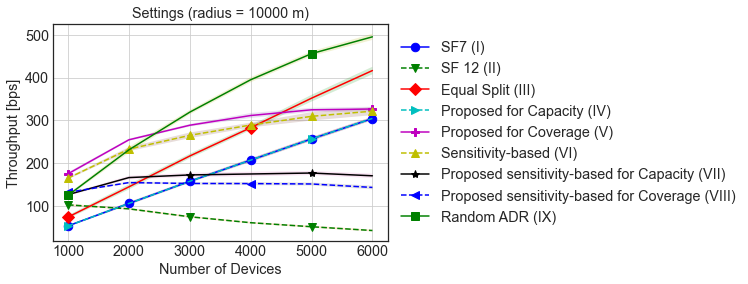

In [7]:
%run plotScript -f "ADR_campaign3_plot.yaml"

In [55]:
%%file plotScriptTwins.py
# Legend
#   RunSeed: 0
#   Seed: 1
#   Algoritmo: 2
#   Radius: 3
#   nDevices: 4
#   appPeriodSeconds:5
#   simulationTime:6
#   PHYTotal: 7
#   PHYSuccessful:8 
#   PHYInterfered: 9
#   PHYNoMoreReceivers: 10
#   PHYUnderSensitivity: 11
#   PHYLostBecauseTX: 12
#   SimulationDuration: 13

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pylab as plt
from itertools import cycle
import scipy.stats as st
import os
import argparse
import yaml
import matplotlib
from random import randint   
import itertools

# New plots
#import matplotlib
# Fix on matplotlib issue with backend
#matplotlib.use('Agg')
#import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

class openSimulation:
    def __init__(self, configurations_file):
        self.email_to = 'fulano@gmail.com'            
        with open(configurations_file, 'r') as f:
            self.doc = yaml.load(f, Loader=yaml.loader.BaseLoader)
        self.campaign_name = os.path.splitext(configurations_file)[0]
        
        # Read commom parameters
        self.showPlot = True;
        self.plotCI = True;                
        self.campaignX = self.doc['scenario']['campaignX']
        self.campaignLines = self.doc['scenario']['campaignLines'][0]
        self.simLocation = str(doc['scenario']['simLocation'])
        self.simulationTime = self.doc['scenario']['simulationTime']
        self.nDevices = self.doc['scenario']['nDevices']
        self.nDevices = list(map(float,self.nDevices))
        self.radius = self.doc['scenario']['radius']
        self.radius = list(map(float,self.radius))
        self.appPeriodSeconds = self.doc['scenario']['appPeriodSeconds']
        self.bPrint = (self.doc['scenario']['bPrint'])
        self.fixedSeed = (self.doc['scenario']['fixedSeed'])
        self.Algoritmo = self.doc['scenario']['algoritmo']
        self.ns3_path = str(self.doc['scenario']['ns3_path'])
        #self.ns3_path = os.getcwd() + '/' + self.ns3_path
        self.ns3_script = str(self.doc['scenario']['ns3_script'])
        self.nJobs = int(self.doc['scenario']['jobs'])
        if self.nJobs == 1: # disable the confidence interval
            self.plotCI = False;
        self.filename = str(self.doc['scenario']['filename'])
        self.targetRealocation  = self.doc['scenario']['targetRealocation']
        
    def doLabelalgoritmo(self, algID):
        # Define labels for plots legends
        if algID == '1':
            return "SF7 (I)"
        elif algID == '2':
            return "SF 12 (II)"
        elif algID == '3':
            return "Equal Split (III)"
        elif algID == '4':
            return "Proposed for Capacity (IV)"
        elif algID == '5':
            return "Proposed for Coverage (V)"
        elif algID == '6':
            return "Sensitivity-based (VI)"
        elif algID == '7':
            return "Proposed sensitivity-based for Capacity (VII)"
        elif algID == '8':
            return "Proposed sensitivity-based for Coverage (VIII)"
        elif algID == '9':
            return "Random ADR (IX)"
        
    def doLabeltargetRealocation(self, realocRate):
        # Define labels for plots legends
        return "Real. = "+realocRate+" %"
        
    def plotCampaign(self,curCampaign):
        # some general configurations
        #outputDir = self.ns3_path+'/results_'+self.simLocation + '_' + curCampaign
        outputDir = self.ns3_path+'/results_'+self.filename+'_' + curCampaign
        chFile = outputDir+ "/" + self.filename + '.txt'        
        print(chFile)
        simTime = np.loadtxt(chFile, skiprows=1, usecols=(6, ), delimiter=',', unpack=False)                
        resalgoritmo = np.loadtxt(chFile, skiprows=1, usecols=(2, ), delimiter=',', unpack=False)
        restargetRealocation = np.loadtxt(chFile, skiprows=1, usecols=(14, ), delimiter=',', unpack=False)
        resradius = np.loadtxt(chFile, skiprows=1, usecols=(3, ), delimiter=',', unpack=False)
        resnDevices = np.loadtxt(chFile, skiprows=1, usecols=(4, ), delimiter=',', unpack=False)
        ressimDur = np.loadtxt(chFile, skiprows=1, usecols=(13, ), delimiter=',', unpack=False)
        resphyTotal = np.loadtxt(chFile, skiprows=1, usecols=(7, ), delimiter=',', unpack=False)
        resphySucc = np.loadtxt(chFile, skiprows=1, usecols=(8, ), delimiter=',', unpack=False)
        markers_on_all = cycle(list(itertools.product([0], [1,2,3,4,5])))
        markersA = cycle(('o', 'v', 'D', '>', 'P', '^', '*', '<', 's', 'H', 'D', 'd'))
        lineA = cycle(('-', '--',  '-', '--', '-', '--', '-', '--', '-', '--', '-','--'))
        colors = cycle(('b', 'g', 'r', 'c', 'm', 'y', 'k'))      
        
        plt.figure()
        fig, ax = plt.subplots()
        ax.set_facecolor("white")
        plotsLinearScale = 0
        for iMet in ['PDR', 'Tput']:
            metric = iMet
            #for iAlg in self.algoritmo:
            for curLine in self.doc['scenario'][self.campaignLines]: 
                m_pdr, m_pdrCI, m_tput, m_tputCI, m_pkt, m_pktCI = [], [], [], [], [], []
                color=next(colors)
                marker=next(markersA)
                line=next(lineA)
                markers_on=next(markers_on_all)
                #label = self.doLabel(iAlg)            
                label = eval('self.doLabel'+self.campaignLines+'(str(curLine))')
                # Current values of line metrics'
                curMetricLine = eval('res'+self.campaignLines)
                resxData = eval('sorted(self.'+curCampaign+',key=int)')             
                
                for varParam in sorted(self.doc['scenario'][curCampaign],key=int):                
                    
                    # Current values of y-axis metrics
                    curMetricAxis = eval('res'+curCampaign)
                    resalgIndexs = (curMetricLine == int(curLine)) & (curMetricAxis == int(varParam))                
                                    
                    if str(curCampaign) == 'radius':
                        #resalgIndexs = (resalg == int(iAlg)) & (resradius == int(varParam))
                        chtitle = 'Settings ('+ self.doc['scenario']['nDevices'][0] +' devices)'
                        xlabel='Distance [m]'
                        #resxData = sorted(self.radius,key=int) 
                        # label = self.doLabel(iAlg)
                    elif str(curCampaign) == 'nDevices':
                    #    resalgIndexs = (resalg == int(iAlg)) & (resnDevices == int(varParam))                    
                        xlabel='Number of Devices'
                        chtitle = 'Settings (radius = '+ self.doc['scenario']['radius'][0] +' m)'
                    #    resxData = sorted(self.nDevices,key=int)
                    #    label = self.doLabel(iAlg)
                    elif str(curCampaign) == 'targetRealocation':
                    #    resalgIndexs = (resalg == int(iAlg)) & (restargetRealocation == int(varParam))                    
                        xlabel='Taxa de realocação [%]'
                        chtitle = 'Configuração ('+ self.doc['scenario']['nDevices'][0] +' dispositivos, raio = '+ self.doc['scenario']['radius'][0]+')'
                    #    resxData = self.targetRealocation
                                            
                    # Pdr Evaluation
                    if metric=='PDR':                
                        # Calculate PDR line
                        pdr = 100*( resphySucc[resalgIndexs]  / resphyTotal[resalgIndexs])
                        m_pdr = np.append(m_pdr, np.mean(pdr))
                        # Confidence interval according to https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
                        l, h = st.t.interval(0.95, len(pdr)-1, loc=np.mean(pdr), scale=st.sem(pdr))
                        #l,h = st.norm.interval(0.95, loc=np.mean(pdr), scale=st.sem(pdr))                                                            
                        m_pdrCI = np.append(m_pdrCI, h)
                    elif metric=='Tput':
                        # TODO
                        # Calculate Tput line
                        tput = 8*23*( resphySucc[resalgIndexs] ) / float(self.simulationTime)
                        m_tput = np.append(m_tput, np.mean(tput))
                        # Confidence interval according to https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
                        l, h = st.t.interval(0.95, len(tput)-1, loc=np.mean(tput), scale=st.sem(tput))
                        #l,h = st.norm.interval(0.95, loc=np.mean(tput), scale=st.sem(tput))                    
                        m_tputCI = np.append(m_tputCI, h)
                    
                
                alpha = 0.2    
                # Plot line
                if metric=='PDR':                         
                    #plt.plot(resxData,m_pdr, label=label, marker=marker,color=color,markevery=markers_on)   
                    ax.plot(resxData,m_pdr, label=label, marker=marker,color=color,markevery=markers_on,ls=line,markersize=8.5)   
                    #err=(m_pdrCI-m_pdr)
                    #plt.fill_between(resxData, (m_pdr-err), (m_pdr+err), alpha=alpha)
                    #if bool(self.plotCI):
                        #plt.errorbar(resxData,m_pdr, yerr=(m_pdrCI-m_pdr), color=color, ls = 'none', marker=marker, lw = 2, capthick = 2,markevery=markers_on)
                    plotsLinearScalePDR = m_pdr[0]
                        
                elif metric=='Tput':
                    # TODO
                    plotsLinearScaleTput = m_tput[0]
                    #plt.plot(resxData,m_tput, label=label, marker=marker,color=color,markevery=markers_on) 
                    #mn, mx = ax.get_ylim()
                    #ax2=ax.twinx()
                    #ax2.set_ylim(mn, mx)
                    #ax2.plot(resxData,m_tput, label=label, marker=marker,color=color,markevery=markers_on,ls=line,markersize=8.5) 
                    #err=(m_tputCI-m_tput)
                    #plt.fill_between(resxData, (m_tput-err), (m_tput+err), alpha=alpha)
                    
                    #if bool(self.plotCI):                
                    #    plt.errorbar(resxData,m_tput, yerr = (m_tputCI-m_tput), marker=marker,color=color, ls = 'none', lw = 2, capthick = 2,markevery=markers_on)
                        
            # Plot figure
            params = {'legend.fontsize': 'x-large',
            'axes.labelsize': 'x-large',
            'axes.titlesize':'x-large',
            'xtick.labelsize':'x-large',
            'ytick.labelsize':'x-large'}
            #plt.rcParams.update(params)        
            os.makedirs(outputDir+"/ps", exist_ok=True)
            os.makedirs(outputDir+"/png", exist_ok=True)
                
            if metric=='PDR':        
                # Show and save PDR plot
                ylabel="PDR [%]"
                plt.ylabel(ylabel)
            elif metric=='Tput':
                # Show and save PDR plot
                plotsLinearScale = plotsLinearScaleTput/plotsLinearScalePDR
                ylabel="Throughput [bps]"
                mn, mx = ax.get_ylim()
                ax2=ax.twinx()
                ax2.set_ylim(plotsLinearScale*mn, plotsLinearScale*mx)
                ax2.set_ylabel(ylabel)
                
        if bool(self.plotCI):
            imgfilename = 'PDR_TPUT_CI_'+curCampaign
        else:
            imgfilename = 'PDR_TPUT_'+curCampaign    
        
        # Plot general configuration
        nPixels = 500
        ax.set_xlabel(xlabel)
        ax.set_title(chtitle)
        #plt.legend(loc='best', numpoints=1) 
        #plt.tight_layout()
        lgd = ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
        plt.grid()
        #box = ax.get_position()
        #ax.set_position([0.1, 0.1, box.width, box.height])
        #print(box)
        
        plt.savefig(outputDir+"/png/"+imgfilename+".png",
                    dpi=nPixels,
                    bbox_extra_artists=(lgd,),
                    bbox_inches='tight')
                   
        #plt.savefig(outputDir+"/ps/"+imgfilename+".eps")
        #if bool(self.showPlot):
        #    plt.show()
        #else:
        #    plt.close()
                
               
        
parser = argparse.ArgumentParser()
parser.add_argument("-f", "--file", type=str, help='Configuration File')
args = parser.parse_args()

configurations_file = args.file; 
with open(configurations_file, 'r') as f:
    doc = yaml.load(f, Loader=yaml.loader.BaseLoader)
    campaign_name = os.path.splitext(configurations_file)[0]

# print(doc)
print('Simulação escolhida: ')
campaign = doc['scenario']['campaignX']
print(campaign)
                 
simu = openSimulation(configurations_file)
for simC in campaign:
    if str(simC) == 'nDevices' or str(simC) == 'radius' or str(simC) == 'targetRealocation':
        simu.plotCampaign(simC);
    else:
        print('Invalid simulation campaign: verify the campaign parameter!')

Overwriting plotScriptTwins.py


Simulação escolhida: 
['radius', 'nDevices']
./simulations_vicente//results_CampaignLoraWAN1_radius/CampaignLoraWAN1.txt
./simulations_vicente//results_CampaignLoraWAN1_nDevices/CampaignLoraWAN1.txt


<Figure size 432x288 with 0 Axes>

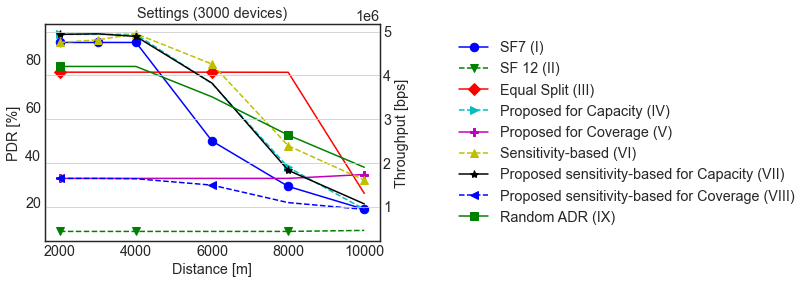

<Figure size 432x288 with 0 Axes>

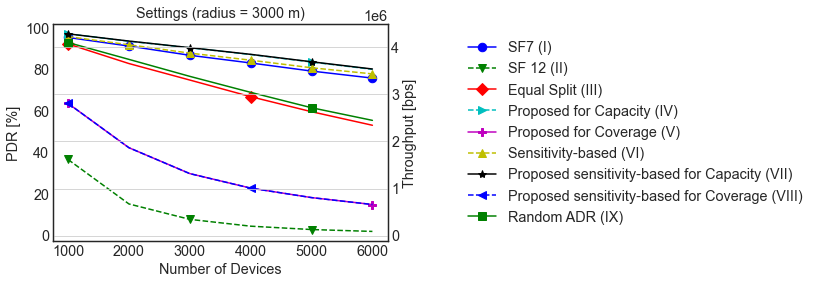

In [56]:
%run plotScriptTwins -f "ADR_campaign1_plot.yaml"